In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1=pd.read_excel('train.xlsx')
df2=pd.read_excel('test.xlsx')

In [4]:
df1.shape,df2.shape

((3998, 39), (1500, 39))

In [5]:
df=pd.concat([df1,df2],axis=0)

In [6]:
df.reset_index(drop=True,inplace=True)

In [7]:
df.shape

(5498, 39)

In [8]:
df.tail(2)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
5496,test,919755,?,?,?,?,?,m,1991-08-10,63.33,...,-1,-1,-1,-1,-1,-0.8772,-1.4526,0.1637,-0.1076,-2.2021
5497,test,1037308,?,?,?,?,?,m,1990-10-23,66.00,...,-1,438,-1,-1,-1,-0.3027,-1.2861,0.0100,0.2727,-0.6692


1. We will drop DOJ,DOL,Designation and JobCity features as they are dependent features. In here, we are just considering the prediction of Salary.
2. ID is unique and doesn't make any sense to consider it

In [9]:
df.drop(['ID','DOJ','DOL','Designation','JobCity'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5498 entries, 0 to 5497
Data columns (total 34 columns):
Unnamed: 0               5498 non-null object
Salary                   5498 non-null object
Gender                   5498 non-null object
DOB                      5498 non-null datetime64[ns]
10percentage             5498 non-null float64
10board                  5498 non-null object
12graduation             5498 non-null int64
12percentage             5498 non-null float64
12board                  5498 non-null object
CollegeID                5498 non-null int64
CollegeTier              5498 non-null int64
Degree                   5498 non-null object
Specialization           5498 non-null object
collegeGPA               5498 non-null float64
CollegeCityID            5498 non-null int64
CollegeCityTier          5498 non-null int64
CollegeState             5498 non-null object
GraduationYear           5498 non-null int64
English                  5498 non-null int64
Logical        

In [11]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [12]:
def summary(df):
    local=pd.DataFrame()
    local['Missing Values']=df.isnull().sum()
    local['No.of Unique']=df.nunique()
    local['Data Type']=df.dtypes
    return(local)

In [13]:
summary(df)

,Missing Values,No.of Unique,Data Type
Unnamed: 0,0,2,object
Salary,0,178,object
Gender,0,2,object
DOB,0,2126,datetime64[ns]
10percentage,0,996,float64
10board,0,351,object
12graduation,0,17,int64
12percentage,0,917,float64
12board,0,431,object
CollegeID,0,1570,int64


1. We observe that the data type of Salary is object which in reality should be either int or float. This means that there is a special character present. That becomes null value
2. College ID and COllege City ID are IDs and may not really contribute in the prediction. We can go ahead and think of getting them binned and convert those into categorical variables
3. From the DOB column, we can extract the year and find the age of the candidate at the time of graduation by subtracting it from the graduation year
4. Also in the data description, -1 is used to depict the null values in features of Domain and different ENGG tests.

In [14]:
df['Salary'].replace(to_replace='?',value=np.nan,inplace=True)

In [15]:
df['Domain'].replace(to_replace=-1,value=np.nan,inplace=True)
df['ComputerProgramming'].replace(to_replace=-1,value=np.nan,inplace=True)
df['ElectronicsAndSemicon'].replace(to_replace=-1,value=np.nan,inplace=True)
df['ComputerScience'].replace(to_replace=-1,value=np.nan,inplace=True)
df['MechanicalEngg'].replace(to_replace=-1,value=np.nan,inplace=True)
df['ElectricalEngg'].replace(to_replace=-1,value=np.nan,inplace=True)
df['TelecomEngg'].replace(to_replace=-1,value=np.nan,inplace=True)
df['CivilEngg'].replace(to_replace=-1,value=np.nan,inplace=True)
      

In [16]:
def miss_val(df):
    miss=df.isnull().sum()[df.isnull().sum()!=0]
    percent=round((miss/len(df))*100,2)
    miss_val=pd.concat([miss,percent],axis=1).reset_index()
    miss_val.rename(columns={'index':'Feature_Name',0:'No. of missing values',1:'Percent of missing values'},inplace=True)
    return (miss_val)


In [17]:
miss_val(df)

,Feature_Name,No. of missing values,Percent of missing values
0,Salary,1500,27.28
1,Domain,332,6.04
2,ComputerProgramming,1180,21.46
3,ElectronicsAndSemicon,3924,71.37
4,ComputerScience,4278,77.81
5,MechanicalEngg,5177,94.16
6,ElectricalEngg,5265,95.76
7,TelecomEngg,4968,90.36
8,CivilEngg,5435,98.85


1. Most of the students take Computer Programming test
2. Very few students take Civil Engg test.
3. It does not make sense to include these features with such less data points.
4. The null values in Salary are pertaining to the test data.


In [18]:
df.columns

Index(['Unnamed: 0', 'Salary', 'Gender', 'DOB', '10percentage', '10board',
       '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier',
       'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

#### Dealing with the missing values for the marks section

In [19]:
new=df[['ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg']]

In [20]:
new.head(2)

,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,445.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,466.0,NaN,NaN,NaN,NaN,NaN


In [21]:
new['Sum']=new.sum(axis=1)

In [22]:
new['Count']=new.iloc[:,0:-1].count(axis=1)

1. Since all the marks are in range 100 - 900, we consider that each scored marks are out of 900. Thus, we find the percentage value for each subject and add those to find the cumuative marks.

In [23]:
new['Percent']=round((new['Sum']/(900*new['Count']))*100,2)

In [24]:
new.head()

,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,Sum,Count,Percent
0,445.0,NaN,NaN,NaN,NaN,NaN,NaN,445.0,1,49.44
1,NaN,466.0,NaN,NaN,NaN,NaN,NaN,466.0,1,51.78
2,395.0,NaN,NaN,NaN,NaN,NaN,NaN,395.0,1,43.89
3,615.0,NaN,NaN,NaN,NaN,NaN,NaN,615.0,1,68.33
4,NaN,233.0,NaN,NaN,NaN,NaN,NaN,233.0,1,25.89


We shall use this column of percent in our calculations so we don't loos out on any data

In [25]:
df['Marks_Percent']=new['Percent']

Now dropping the original columns of marks.

In [26]:
df.drop(['ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg'],axis=1,inplace=True)

#### Fetching the Birth Year of the student from DOB


In [27]:
df['BirthYr']=df['DOB'].dt.year

In [28]:
df.drop('DOB',axis=1,inplace=True)

#### Dealing with GPA whose values are out of 10. Making those out of 100

In [29]:
df['collegeGPA']=[round(x*10,2) if x<=10 else x for x in df['collegeGPA']]

#### For different states, we shall make those into regions and deal with it

In [30]:
N=['Uttar Pradesh','Haryana','Punjab','Rajasthan','Uttarakhand', 'Jammu and Kashmir', 'Himachal Pradesh']
S=['Andhra Pradesh','Karnataka', 'Tamil Nadu','Telangana', 'Kerala']
W=['Maharashtra','Gujarat','Goa']
E=['Bihar','Jharkhand','Orissa','West Bengal']
C=['Chhattisgarh','Madhya Pradesh']

In [31]:
def region(x):
    if x in N:
        return ('North')
    elif x in S:
        return ('South')
    elif x in W:
        return ('West')
    elif x in E:
        return ('East')
    elif x in C:
        return ('Central')
    else:
        return ('Other')

In [32]:
df['Region']=df['CollegeState'].apply(region)
df.drop('CollegeState',axis=1,inplace=True)

#### Dealing with the 10board and 12board and making those into central and state board

In [33]:
df['10board']=df['10board'].replace(to_replace=['c b s e','cbsc','cbse board','cbse[gulf zone]',
                       'central board of secondary education',
                       'central board of secondary education(cbse)','central board of secondary education,new delhi'],
                      value='cbse')

In [34]:
df['10board']=df['10board'].replace(to_replace=['cicse','cisce','council for indian school certificate examination',
                                 'council of indian school certificate examinations','icse board','icse board , new delhi',
                                 'indian certificate for secondary education'],
                      value='icse')

In [35]:
df['12board']=df['12board'].replace(to_replace=['c b s e','cbsc','cbse board','cbese','cbse,new delhi'
                       'central board of secondary education','central board of school education',
                       'central board of secondary education(cbse)','central board of secondary education,new delhi',
                                                'central board of secondary education, new delhi'],
                      value='cbse')

In [36]:
df['12board']=df['12board'].replace(to_replace=['cicse','cisce','council for indian school certificate examination',
                                 'council of indian school certificate examinations','isc','isc board',
                                                'isc board , new delhi','isce'],
                      value='icse')

In [37]:
def board(x):
    if (x=='cbse' or x=='icse'):
        return ('central board')
    elif x==0:
        return (0)
    else:
        return ('state board')

In [38]:
df['10board']=df['10board'].apply(board)

In [39]:
df['10board']=df['10board'].replace(0,np.nan)

In [40]:
df['12board']=df['12board'].apply(board)

In [41]:
df['12board']=df['12board'].replace(0,np.nan)

#### Calculating the missing value percentage now

In [42]:
miss_val(df)

,Feature_Name,No. of missing values,Percent of missing values
0,Salary,1500,27.28
1,10board,508,9.24
2,12board,522,9.49
3,Domain,332,6.04
4,Marks_Percent,158,2.87


## EDA

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,3998.0,307699.849925,212737.499957,35000.00000,180000.00000,300000.00000,370000.000000,4.000000e+06
10percentage,5498.0,78.050700,9.774724,43.00000,72.00000,79.60000,85.615000,9.776000e+01
12graduation,5498.0,2008.096944,1.636035,1995.00000,2007.00000,2008.00000,2009.000000,2.013000e+03
12percentage,5498.0,74.597506,10.902039,40.00000,66.40000,74.53000,82.800000,9.870000e+01
CollegeID,5498.0,5169.293198,4787.707246,2.00000,513.00000,3879.00000,8816.250000,1.840900e+04
CollegeTier,5498.0,1.925973,0.261839,1.00000,2.00000,2.00000,2.000000,2.000000e+00
collegeGPA,5498.0,71.788920,7.361638,43.90000,66.90000,71.90000,76.465000,9.993000e+01
CollegeCityID,5498.0,5169.293198,4787.707246,2.00000,513.00000,3879.00000,8816.250000,1.840900e+04
CollegeCityTier,5498.0,0.294289,0.455764,0.00000,0.00000,0.00000,1.000000,1.000000e+00
GraduationYear,5498.0,2012.246453,27.174495,0.00000,2012.00000,2013.00000,2014.000000,2.017000e+03


1. We observe that there is possibility of the outliers in the salary
2. The features which can have outliers are conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3. We shall deal with them as we proceed

In [44]:
df.columns

Index(['Unnamed: 0', 'Salary', 'Gender', '10percentage', '10board',
       '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier',
       'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Marks_Percent', 'BirthYr',
       'Region'],
      dtype='object')

In [45]:
num=['10percentage',
       '12graduation', '12percentage', 'collegeGPA', 
        'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Marks_Percent', 'BirthYr']

In [46]:
cat=[ 'Gender', '10board',
        '12board', 'CollegeID', 'CollegeTier',
       'Degree', 'Specialization',  'CollegeCityID',
       'CollegeCityTier','Region']

In [47]:
len(num),len(cat),df.shape[1]

(16, 10, 28)

#### Dealing with Specialization using the fuzzy logic method
1. Since we already have the details ready in the other sheet, we shall not work on it again and just implement it here

In [48]:
y=pd.read_excel('y.xlsx')

In [49]:
y.head(2)

,Unnamed: 0,Specialization,SPL,Degree
0,0,computer engineering,Computer,90
1,1,electronics and communication engineering,Electronics,90


In [50]:
y['SPL'].value_counts(1)

Computer       0.399236
Electronics    0.327392
Information    0.170607
Mechanical     0.050382
Other          0.024009
Electrical     0.020371
Civil          0.008003
Name: SPL, dtype: float64

In [51]:
df['Specialzn']=y['SPL']

df.drop('Specialization',axis=1,inplace=True)

In [52]:
df.head(2)

,Unnamed: 0,Salary,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Marks_Percent,BirthYr,Region,Specialzn
0,train,420000.0,f,84.3,state board,2007,95.8,state board,1141,2,...,0.635979,0.9737,0.8128,0.5269,1.3549,-0.4455,49.44,1990,South,Computer
1,train,500000.0,m,85.4,central board,2007,85.0,central board,5807,2,...,0.960603,-0.7335,0.3789,1.2396,-0.1076,0.8637,51.78,1989,Central,Electronics


In [53]:
cat.remove('Specialization')

In [54]:
cat.append('Specialzn')

In [55]:
def grad(x):
    if x=='B.Tech/B.E.':
        return ('UnderGrad')
    else:
        return ('PostGrad')

In [56]:
df['Degree']=df['Degree'].apply(grad)

#### Dealing with the College ID and College City ID
1. College ID and College City ID are one and the same.Hence, we can drop one of the entity.
2. We shall use qcut to bin the college IDs with the help of quantiles. We shall take into consideration the number of instances under each college ID.
3. As per the qcut, college ID which have instances more than 4 are termed as high,  and less than 4 are termed as low

In [57]:
df['CollegeID'].value_counts()

272      127
64        57
11759     48
47        46
44        45
        ... 
7230       1
11916      1
15418      1
15406      1
12290      1
Name: CollegeID, Length: 1570, dtype: int64

In [58]:
new1=pd.DataFrame(pd.qcut(df['CollegeID'].value_counts(),2,labels=['low','high'],duplicates='drop')).reset_index()

In [59]:
new1.rename(columns={'index':'College_ID','CollegeID':'Type'},inplace=True)

In [60]:
new1['Type'].value_counts()

low     984
high    586
Name: Type, dtype: int64

In [61]:
def collegeid(x):
    if x in list(new1.loc[new1['Type']=='high','College_ID']):
        return ('high')
    else:
        return ('low')

In [62]:
df['CollegeID_cat']=df['CollegeID'].apply(collegeid)

In [63]:
df['CollegeID_cat'].value_counts()

high    4234
low     1264
Name: CollegeID_cat, dtype: int64

Thus, high means this student comes from a college which has better representation in the dataset and might be this college falls under the higher tier college

In [64]:
df.drop(['CollegeID','CollegeCityID'],axis=1,inplace=True)

In [65]:
df.shape

(5498, 27)

Checking the relation between the new category formed and college tier

In [66]:
pd.crosstab(index=df['CollegeTier'],columns=df['CollegeID_cat'])

CollegeID_cat,high,low
CollegeTier,,
1,338,69
2,3896,1195


Thus the assumption that higher number representation of the dataset from a college has no relation to tier of the college. Thus, we just plainly consider the number of instances for the purpose of qcut

In [67]:
cat.remove('CollegeID')

In [68]:
cat.remove('CollegeCityID')

In [69]:
cat.append('CollegeID_cat')

## Outlier Treatment

#### Salary

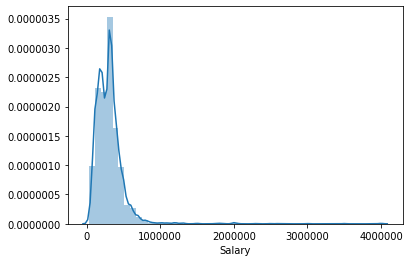

In [70]:
sns.distplot(df['Salary'].dropna())

In [71]:
np.percentile(df['Salary'].dropna(),99)

930599.9999999949

In [72]:
df['Salary'][df['Salary']>930599.9999999949].shape

(40,)

We see that 1% of the total reading have values greater than 99 percentile of salary. Let's cap the salary to 99 percentile

In [73]:
def salary(x):
    if x>1000000:
        return (1000000)
    else:
        return (x)

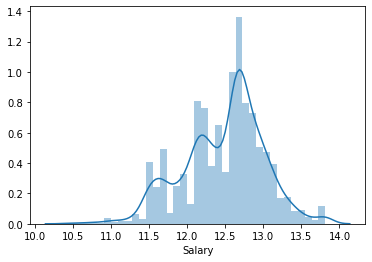

In [74]:
sns.distplot(np.log(df['Salary'].apply(salary).dropna()))

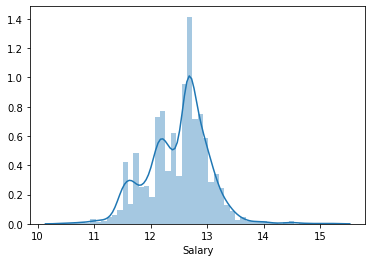

In [75]:
sns.distplot(np.log(df['Salary'].dropna()))

In [76]:
(np.log1p(df['Salary'].dropna())).skew()

-0.09828937278105368

In [77]:
(np.log1p(df['Salary'].apply(salary).dropna())).skew()

-0.3603360751185323

In [78]:
(df['Salary'].apply(salary).dropna()).skew()

1.391247833734634

1. From above we see that the percentile capping doesn't really reduce the skewness. Also after capping and then taking the log doesn't reduce the skewness. Thus, we just move ahead with taking the log of the original data without capping.
2. Thus, we shall not loose any important observations also

In [79]:
df['Salary']=np.log(df['Salary'])

#### Outliers in 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience'

In [80]:
lst=['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

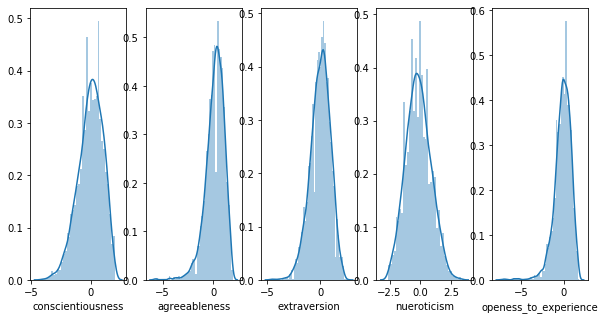

In [81]:
f,ax=plt.subplots(1,5,figsize=[10,5])
sns.distplot(df['conscientiousness'].dropna(),ax=ax[0])
sns.distplot(df['agreeableness'].dropna(),ax=ax[1])
sns.distplot(df['extraversion'].dropna(),ax=ax[2])
sns.distplot(df['nueroticism'].dropna(),ax=ax[3])
sns.distplot(df['openess_to_experience'].dropna(),ax=ax[4])

In [82]:
for col in lst:
    print(col,df[col].skew())

conscientiousness -0.5037661142939938
agreeableness -1.1320152347416725
extraversion -0.46931116726960864
nueroticism 0.16880473338468807
openess_to_experience -1.3937641255340532


Thus, from graphs and skewness values, we understand that except for nueroticism, all other features have outliers. (note that the threshold for skewness is 0.2)

In [83]:
var=df[lst]

In [84]:
var.head(2)

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,0.9737,0.8128,0.5269,1.3549,-0.4455
1,-0.7335,0.3789,1.2396,-0.1076,0.8637


In [85]:
#Normalizing the data
var['conscientiousness_norm']=(var['conscientiousness']-var['conscientiousness'].min())/(var['conscientiousness'].max()-var['conscientiousness'].min())
var['agreeableness_norm']=(var['agreeableness']-var['agreeableness'].min())/(var['agreeableness'].max()-var['agreeableness'].min())
var['extraversion_norm']=(var['extraversion']-var['extraversion'].min())/(var['extraversion'].max()-var['extraversion'].min())
var['nueroticism_norm']=(var['nueroticism']-var['nueroticism'].min())/(var['nueroticism'].max()-var['nueroticism'].min())
var['openess_to_experience_norm']=(var['openess_to_experience']-var['openess_to_experience'].min())/(var['openess_to_experience'].max()-var['openess_to_experience'].min())

In [86]:
var.skew()

conscientiousness            -0.503766
agreeableness                -1.132015
extraversion                 -0.469311
nueroticism                   0.168805
openess_to_experience        -1.393764
conscientiousness_norm       -0.503766
agreeableness_norm           -1.132015
extraversion_norm            -0.469311
nueroticism_norm              0.168805
openess_to_experience_norm   -1.393764
dtype: float64

1. Thus, normalization doesn't change the skewness, but just shifts the distribution
2. To reduce the skewness, we should square/cube/take log etc of the data

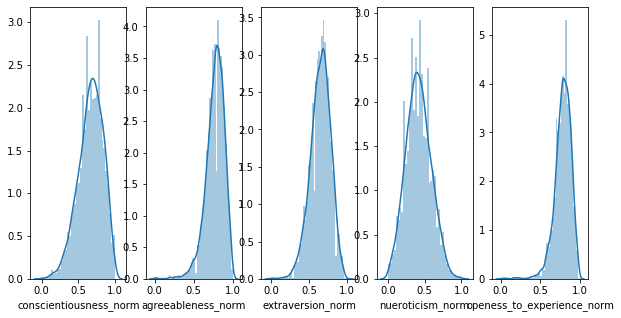

In [87]:
f,ax=plt.subplots(1,5,figsize=[10,5])
sns.distplot(var['conscientiousness_norm'],ax=ax[0])
sns.distplot(var['agreeableness_norm'],ax=ax[1])
sns.distplot(var['extraversion_norm'],ax=ax[2])
sns.distplot(var['nueroticism_norm'],ax=ax[3])
sns.distplot(var['openess_to_experience_norm'],ax=ax[4])

In [88]:
var.columns

Index(['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'conscientiousness_norm', 'agreeableness_norm',
       'extraversion_norm', 'nueroticism_norm', 'openess_to_experience_norm'],
      dtype='object')

1. For conscientiousness and extraversion, square the data
2. For agreeableness and openess to experience, cube the data
3. For nueroticism, keep as is
4. Note, above results are obtained on normalized data and the transformation factors are obtained after doing trial and errors

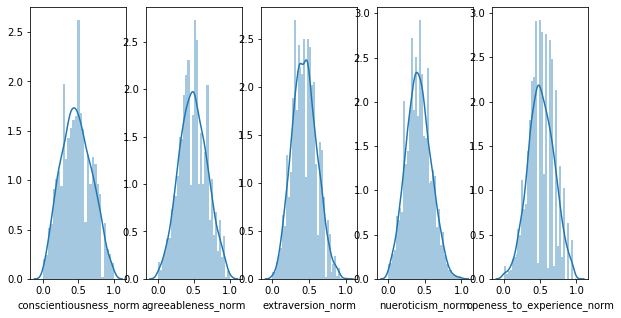

In [89]:
f,ax=plt.subplots(1,5,figsize=[10,5])
sns.distplot(var['conscientiousness_norm']**2,ax=ax[0])
sns.distplot(var['agreeableness_norm']**3,ax=ax[1])
sns.distplot(var['extraversion_norm']**2,ax=ax[2])
sns.distplot(var['nueroticism_norm'],ax=ax[3])
sns.distplot(var['openess_to_experience_norm']**3,ax=ax[4])

1. Thus, we see that the skewness has reduced and the curves are approaching the normal
2. Putting these values in actual dataframe

In [90]:
df['conscientiousness']=var['conscientiousness_norm']**2
df['extraversion']=var['extraversion_norm']**2
df['agreeableness']=var['agreeableness_norm']**3
df['openess_to_experience']=var['openess_to_experience_norm']**3
df['nueroticism']=var['nueroticism_norm']

In [91]:
miss_val(df)

,Feature_Name,No. of missing values,Percent of missing values
0,Salary,1500,27.28
1,10board,508,9.24
2,12board,522,9.49
3,Domain,332,6.04
4,Marks_Percent,158,2.87


### Skewness for all the numerical variables

In [92]:
df[num].skew()

10percentage             -0.623268
12graduation             -0.937346
12percentage             -0.044178
collegeGPA                0.121280
GraduationYear          -73.890915
English                   0.177313
Logical                  -0.206086
Quant                    -0.025784
Domain                   -0.383972
conscientiousness         0.136730
agreeableness             0.069551
extraversion              0.173649
nueroticism               0.168805
openess_to_experience    -0.016784
Marks_Percent             0.241939
BirthYr                  -0.793421
dtype: float64

1. We see that the skewness for 10percentage and Domain is high.
2. In case of Graduation Year, 12graduation and Birth yr, these are years and we can hence see if we can make them to category

#### Graduation Year,BirthYr and 12graduation

In [93]:
df['GraduationYear'].unique()

array([2011, 2012, 2014, 2016, 2013, 2010, 2015, 2009, 2017,    0, 2007,
       2008], dtype=int64)

In [94]:
df.loc[df['GraduationYear']==0,'GraduationYear']=2014

In [95]:
df['GraduationYear'].skew()

-0.39381568472400197

We shall not deal with the skewness for the years in the data and use them as is

In [96]:
#df.to_excel('Dataset.xlsx')

## Splitting of data

1. Before missing value treatment,encoding and scaling we will divide the data in train,validation and test.
2. The validation data set will be formed from train dataset only

In [97]:
df.head(2)

,Unnamed: 0,Salary,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,...,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Marks_Percent,BirthYr,Region,Specialzn,CollegeID_cat
0,train,12.948010,f,84.3,state board,2007,95.8,state board,2,UnderGrad,...,0.694100,0.631476,0.516316,0.666817,0.427704,49.44,1990,South,Computer,high
1,train,13.122363,m,85.4,central board,2007,85.0,central board,2,UnderGrad,...,0.307208,0.514848,0.669813,0.422884,0.718774,51.78,1989,Central,Electronics,high


In [98]:
train=df[df['Unnamed: 0']=='train']

In [99]:
test=df[df['Unnamed: 0']=='test']

Now splitting the train data into train and validate

In [100]:
X=train.drop('Salary',axis=1)
y=train['Salary']

In [101]:
X_test=test.drop('Salary',axis=1)

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3)

In [104]:
X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape

((3198, 26), (800, 26), (1500, 26), (3198,), (800,))

In [105]:
X_train.reset_index(drop=True,inplace=True)

In [106]:
X_val.reset_index(drop=True,inplace=True)

In [107]:
X_test.reset_index(drop=True,inplace=True)

In [108]:
y_train.reset_index(drop=True,inplace=True)

In [109]:
y_val.reset_index(drop=True,inplace=True)

In [110]:
X_train.drop('Unnamed: 0',axis=1,inplace=True)

In [111]:
X_val.drop('Unnamed: 0',axis=1,inplace=True)

In [112]:
X_test.drop('Unnamed: 0',axis=1,inplace=True)

### Missing Value Treatment

In [113]:
print(X_train.loc[X_train['CollegeTier']==1,'10board'].value_counts(1))
print(X_train.loc[X_train['CollegeTier']==2,'10board'].value_counts(1))

central board    0.764706
state board      0.235294
Name: 10board, dtype: float64
state board      0.559064
central board    0.440936
Name: 10board, dtype: float64


In [114]:
print(X_train.loc[X_train['CollegeTier']==1,'12board'].value_counts(1))
print(X_train.loc[X_train['CollegeTier']==2,'12board'].value_counts(1))

central board    0.746606
state board      0.253394
Name: 12board, dtype: float64
state board      0.591282
central board    0.408718
Name: 12board, dtype: float64


1. We see that the students in college tier 2 mostly prefer state board while the ones in tier 1 prefer central board. This is the case for both 10th and 12th boards.
2. Thus, we can go ahead and fill the nulls accordingly

In [115]:
# For train data
for i in X_train['CollegeTier'].values:
    if i==1:
        X_train['10board']=X_train['10board'].fillna('central board')
        X_train['12board']=X_train['12board'].fillna('central board')
    else:
        X_train['10board']=X_train['10board'].fillna('state board')
        X_train['12board']=X_train['12board'].fillna('state board')

In [116]:
# For validation data
for i in X_val['CollegeTier'].values:
    if i==1:
        X_val['10board']=X_val['10board'].fillna('central board')
        X_val['12board']=X_val['12board'].fillna('central board')
    else:
        X_val['10board']=X_val['10board'].fillna('state board')
        X_val['12board']=X_val['12board'].fillna('state board')

In [117]:
# For test data
for i in X_test['CollegeTier'].values:
    if i==1:
        X_test['10board']=X_test['10board'].fillna('central board')
        X_test['12board']=X_test['12board'].fillna('central board')
    else:
        X_test['10board']=X_test['10board'].fillna('state board')
        X_test['12board']=X_test['12board'].fillna('state board')

In [118]:
miss_val(X_train),miss_val(X_val),miss_val(X_test)

(    Feature_Name  No. of missing values  Percent of missing values
 0         Domain                    187                       5.85
 1  Marks_Percent                     98                       3.06,
     Feature_Name  No. of missing values  Percent of missing values
 0         Domain                     59                       7.38
 1  Marks_Percent                     32                       4.00,
     Feature_Name  No. of missing values  Percent of missing values
 0         Domain                     86                       5.73
 1  Marks_Percent                     28                       1.87)

In [119]:
m_d=X_train['Domain'].median()
print(m_d)
m_m=X_train['Marks_Percent'].median()
print(m_m)

0.635978756456794
46.33


In [120]:
#For Train data
X_train['Marks_Percent'].fillna(m_m,inplace=True)
X_train['Domain'].fillna(m_d,inplace=True)


In [121]:
#For Validation data
X_val['Marks_Percent'].fillna(m_m,inplace=True)
X_val['Domain'].fillna(m_d,inplace=True)

In [122]:
#For Test data
X_test['Marks_Percent'].fillna(m_m,inplace=True)
X_test['Domain'].fillna(m_d,inplace=True)

In [123]:
X_train.columns

Index(['Gender', '10percentage', '10board', '12graduation', '12percentage',
       '12board', 'CollegeTier', 'Degree', 'collegeGPA', 'CollegeCityTier',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Marks_Percent', 'BirthYr', 'Region',
       'Specialzn', 'CollegeID_cat'],
      dtype='object')

In [124]:
df_X=pd.concat([X_train,X_val,X_test],axis=0).reset_index(drop=True)

In [125]:
#df_X.to_excel('df_X.xlsx')

## Encoding the categorical variables

In [126]:
#Train data
X_train_num=X_train[num]
X_train_cat=X_train[cat]

In [127]:
X_train_cat.shape

(3198, 9)

In [128]:
for col in cat:
    print(col)
    print(X_train_cat[col].unique())

Gender
['m' 'f']
10board
['state board' 'central board']
12board
['state board' 'central board']
CollegeTier
[2 1]
Degree
['UnderGrad' 'PostGrad']
CollegeCityTier
[0 1]
Region
['West' 'Other' 'North' 'South' 'Central' 'East']
Specialzn
['Information' 'Computer' 'Mechanical' 'Electronics' 'Other' 'Electrical'
 'Civil']
CollegeID_cat
['high' 'low']


1. For the features having 2 unique values, we will do nominal label encoding using map/replace
2. For Features having unique values>2, we will use one hot encoding

In [129]:
X_train_cat['Gender'].replace({'m':0,'f':1},inplace=True)
X_train_cat['10board'].replace({'state board':0,'central board':1},inplace=True)
X_train_cat['12board'].replace({'state board':0,'central board':1},inplace=True)
X_train_cat['CollegeTier'].replace({2:0},inplace=True)
X_train_cat['Degree'].replace({'UnderGrad':0,'PostGrad':1},inplace=True)
X_train_cat['CollegeID_cat'].replace({'high':0,'low':1},inplace=True)

In [130]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [131]:
X_train_cat.head(2)

,Gender,10board,12board,CollegeTier,Degree,CollegeCityTier,Region,Specialzn,CollegeID_cat
0,0,0,0,0,0,0,West,Information,0
1,1,0,0,0,1,0,West,Computer,0


In [132]:
X_train_cat.shape

(3198, 9)

In [133]:
X_c1=ohe.fit_transform(X_train_cat[['Region','Specialzn']]).toarray()

In [134]:
X_c1=pd.DataFrame(X_c1,columns=ohe.get_feature_names())

In [135]:
X_c1.shape

(3198, 13)

In [136]:
X_train_cat=pd.concat([X_train_cat,X_c1],axis=1)

In [137]:
X_train_cat.drop(['Region','Specialzn'],axis=1,inplace=True)

In [138]:
X_train_cat.shape

(3198, 20)

In [139]:
# Validation data

In [140]:
#Train data
X_val_num=X_val[num]
X_val_cat=X_val[cat]

In [141]:
X_val_cat.shape

(800, 9)

In [142]:
X_val_cat['Gender'].replace({'m':0,'f':1},inplace=True)
X_val_cat['10board'].replace({'state board':0,'central board':1},inplace=True)
X_val_cat['12board'].replace({'state board':0,'central board':1},inplace=True)
X_val_cat['CollegeTier'].replace({2:0},inplace=True)
X_val_cat['Degree'].replace({'UnderGrad':0,'PostGrad':1},inplace=True)
X_val_cat['CollegeID_cat'].replace({'high':0,'low':1},inplace=True)

In [143]:
X_val_cat.shape

(800, 9)

In [144]:
X_c2=ohe.transform(X_val_cat[['Region','Specialzn']]).toarray()

In [145]:
X_c2=pd.DataFrame(X_c2,columns=ohe.get_feature_names())

In [146]:
X_val_cat=pd.concat([X_val_cat,X_c2],axis=1)

In [147]:
X_val_cat.drop(['Region','Specialzn'],axis=1,inplace=True)

In [148]:
X_val_cat.shape

(800, 20)

In [149]:
# For test data

In [150]:
#Train data
X_test_num=X_test[num]
X_test_cat=X_test[cat]

In [151]:
X_test_cat.shape

(1500, 9)

In [152]:
X_test_cat['Gender'].replace({'m':0,'f':1},inplace=True)
X_test_cat['10board'].replace({'state board':0,'central board':1},inplace=True)
X_test_cat['12board'].replace({'state board':0,'central board':1},inplace=True)
X_test_cat['CollegeTier'].replace({2:0},inplace=True)
X_test_cat['Degree'].replace({'UnderGrad':0,'PostGrad':1},inplace=True)
X_test_cat['CollegeID_cat'].replace({'high':0,'low':1},inplace=True)

In [153]:
X_test_cat.shape

(1500, 9)

In [154]:
X_c3=ohe.transform(X_test_cat[['Region','Specialzn']]).toarray()

In [155]:
X_c3=pd.DataFrame(X_c3,columns=ohe.get_feature_names())

In [156]:
X_test_cat=pd.concat([X_test_cat,X_c3],axis=1)

In [157]:
X_test_cat.drop(['Region','Specialzn'],axis=1,inplace=True)
X_test_cat.shape

(1500, 20)

## Correlation, Significance testing

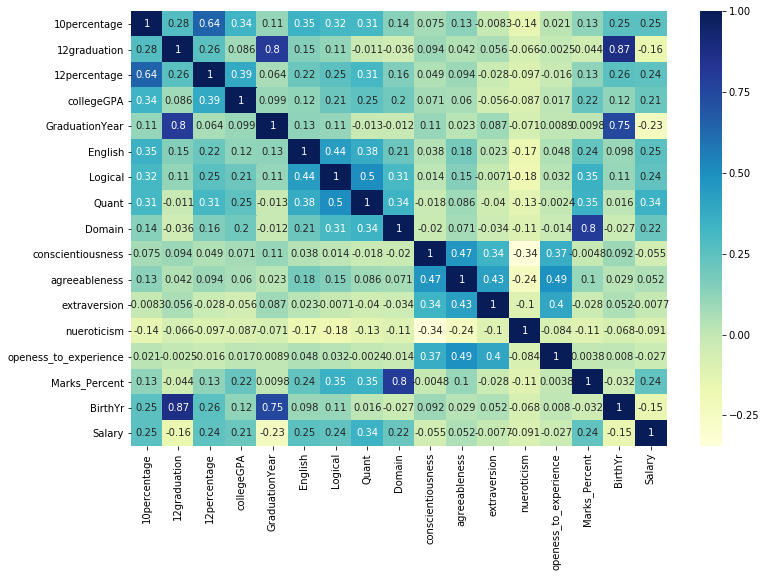

In [158]:
plt.figure(figsize=[12,8])
ax=sns.heatmap((pd.concat([X_train_num,y_train],axis=1)).corr(),cmap="YlGnBu",annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()



1. Salary has positive correlation with 10percentage,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,Marks_Percent
2. Salary has negative correlation with BirthYr and 12graduation

### Numerical variables

In [159]:
import scipy.stats as st

In [160]:
st.jarque_bera(y_train)

(165.40651206571988, 0.0)

As the target is non normal, we have to go with non parametric tests of significance

In [161]:
for col in X_train_num.columns:
    pvalue=st.mannwhitneyu(X_train_num[col],y_train)[1]
    if pvalue<0.05:
        print(col,':',pvalue)

10percentage : 0.0
12graduation : 0.0
12percentage : 0.0
collegeGPA : 0.0
GraduationYear : 0.0
English : 0.0
Logical : 0.0
Quant : 0.0
Domain : 0.0
conscientiousness : 0.0
agreeableness : 0.0
extraversion : 0.0
nueroticism : 0.0
openess_to_experience : 0.0
Marks_Percent : 0.0
BirthYr : 0.0


All numerical variables are significant.

In [162]:
X_temp=pd.concat([X_train_cat,y_train],axis=1)

In [163]:
for col in X_train_cat.columns:
    #print(col)
    s1=X_temp.loc[X_temp[col]==X_temp[col].unique()[0],'Salary']
    s2=X_temp.loc[X_temp[col]==X_temp[col].unique()[1],'Salary']
    pval1=st.jarque_bera(s1)[1]
    pval2=st.jarque_bera(s2)[1]
    if (pval1>0.05 and pval2>0.05):
        pvalue=st.ttest_ind(s1,s2)[1]
        if pvalue<0.05:
            print(col,':',pvalue)
    else:
        pvalue=st.mannwhitneyu(s1,s2)[1]
        if pvalue<0.05:
            print(col,':',pvalue) 

10board : 1.9684625929483113e-07
12board : 2.534060116790015e-07
CollegeTier : 1.0057690007200255e-26
Degree : 0.00117126133506491
CollegeCityTier : 0.03566101555496851
CollegeID_cat : 1.162438904030767e-12
x0_North : 0.005264668414364491
x0_Other : 1.0138017235025016e-05
x1_Civil : 0.017469790767880834


We see that categorical features like 10board,12board,CollegeTier,Degree,CollegeCityTier,CollegeID_cat,North and Other regions and Civil Specialization are significant

## Multicollinearity check for numerical variables in train data

In [164]:
import statsmodels.api as sm
Xc=sm.add_constant(X_train_num)

In [165]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame({'VIF':vif[1:]},index=X_train_num.columns)

,VIF
10percentage,1.967875
12graduation,5.698573
12percentage,1.978810
collegeGPA,1.289066
GraduationYear,3.292010
English,1.423933
Logical,1.597493
Quant,1.576718
Domain,2.812192
conscientiousness,1.509868


1. No high Multicollinearity in the variables. Thus, we can go ahead and build the model.

## Standard Scaling for the numerical variables

In [166]:
from sklearn.preprocessing import StandardScaler

In [167]:
ss=StandardScaler()

In [168]:
#for Train data
X_train_nums=ss.fit_transform(X_train_num)

X_train_nums=pd.DataFrame(X_train_nums)

X_train_nums.columns=X_train_num.columns

In [169]:
#for validation data
X_val_nums=ss.transform(X_val_num)

X_val_nums=pd.DataFrame(X_val_nums)

X_val_nums.columns=X_val_num.columns

In [170]:
#for test data
X_test_nums=ss.transform(X_test_num)

X_test_nums=pd.DataFrame(X_test_nums)

X_test_nums.columns=X_test_num.columns

## Combining the numerical and categorical dataframes

In [171]:
# for Train data
X_train=pd.concat([X_train_nums,X_train_cat],axis=1)

In [172]:
# for val data
X_val=pd.concat([X_val_nums,X_val_cat],axis=1)

In [173]:
# for test data
X_test=pd.concat([X_test_nums,X_test_cat],axis=1)

## Applying the OLS model

In [174]:
Xc=sm.add_constant(X_train)

In [175]:
model=sm.OLS(y_train,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     34.92
Date:                Fri, 25 Sep 2020   Prob (F-statistic):          9.10e-191
Time:                        21:00:02   Log-Likelihood:                -2032.1
No. Observations:                3198   AIC:                             4134.
Df Residuals:                    3163   BIC:                             4347.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.5587      0.020    488.945      0.000       9.520       9.597
10percentage              0.0527      0.012      4.417      0.000       0.029       0.076
12graduation              0.0065      0.021      0.305      0.761      -0.035       0.049
12percentage              0.0410      0.012      3.345      0.001       0.017       0.065
collegeGPA                0.0731      0.010      7.034      0.000       0.053       0.093
GraduationYear           -0.1441      0.017     -8.410      0.000      -0.178      -0.111
English                   0.0624      0.010      6.199      0.000       0.043       0.082
Logical                   0.0061      0.010      0.591      0.554      -0.014       0.026
Quant                     0.0739      0.011      6.835      0.000       0.053       0.095
Domain                    0.0047      0.015      0.325      0.745      -0.024       0.033
conscientiousness        -0.0267      0.010     -2.657      0.008      -0.046      -0.007
agreeableness            -0.0048      0.011     -0.449      0.654      -0.026       0.016
extraversion              0.0342      0.009      3.602      0.000       0.016       0.053
nueroticism              -0.0243      0.009     -2.702      0.007      -0.042      -0.007
openess_to_experience    -0.0183      0.010     -1.857      0.063      -0.038       0.001
Marks_Percent             0.0371      0.017      2.132      0.033       0.003       0.071
BirthYr                  -0.0174      0.018     -0.986      0.324      -0.052       0.017
Gender                   -0.0689      0.021     -3.340      0.001      -0.109      -0.028
10board                   0.0569      0.034      1.672      0.095      -0.010       0.124
12board                  -0.0060      0.035     -0.169      0.866      -0.076       0.064
CollegeTier               0.1699      0.037      4.600      0.000       0.098       0.242
Degree                   -0.0103      0.042     -0.245      0.807      -0.093       0.072
CollegeCityTier          -0.0047      0.021     -0.220      0.826      -0.046       0.037
CollegeID_cat            -0.0906      0.020     -4.500      0.000      -0.130      -0.051
x0_Central                1.6271      0.032     50.592      0.000       1.564       1.690
x0_East                   1.5330      0.026     59.862      0.000       1.483       1.583
x0_North                  1.6110      0.018     91.642      0.000       1.577       1.646
x0_Other                  1.5325      0.042     36.836      0.000       1.451       1.614
x0_South                  1.5996      0.019     83.624      0.000       1.562       1.637
x0_West                   1.6555      0.030     54.607      0.000       1.596       1.715
x1_Civil                  1.5966      0.085     18.759      0.000       1.430       1.763
x1_Computer            

1. Salary increases as the marks in 10th,12th and college GPA increases
2. Salary is dependent on English and Quant marks
3. Salary is dependent on conscientiousness, extraversion and nueroticism
4. Salary is gender,college tier, CollegeId_cat, region and specialization dependent.
5. This is what we observe from the OLS

# Building the base model for data

In [176]:
from sklearn.linear_model import LinearRegression

In [177]:
lr=LinearRegression(fit_intercept=True)

In [178]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:
lr.score(X_train,y_train)

0.272945342509868

In [180]:
y_train_pred=lr.predict(X_train)

In [181]:
lr.score(X_val,y_val)

0.23138240766131735

In [182]:
y_val_pred=lr.predict(X_val)

The base model R2 for the train data is 27% and for validation is 23%

### Calculating the RMSE value

In [183]:
from sklearn.metrics import mean_squared_error

In [184]:
mean_squared_error(y_train,y_train_pred,squared=False)

0.4567953792290699

In [185]:
mean_squared_error(y_val,y_val_pred,squared=False)

0.5021671564257871

## Copying all the dataframes in Excel

In [186]:
#X_train.to_excel('X_train.xlsx',index=False)

In [187]:
#y_train.to_excel('y_train.xlsx',index=False)

In [188]:
#X_val.to_excel('X_val.xlsx',index=False)

In [189]:
#y_val.to_excel('y_val.xlsx',index=False)

In [190]:
#X_test.to_excel('X_test.xlsx',index=False)

-------------------------------------- #### END #### -----------------------------------------------------------------------